<a href="https://colab.research.google.com/github/chuiyunjun/aps490/blob/chi/model_6_Valve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
#!pip install torch==1.10.0
#!pip install kats
#!pip install gdown
import torch.nn as nn
import torch
from tqdm.notebook import tqdm as tqdm
import random
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler


random.seed(0)

In [3]:
from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)
drive.mount('/content/drive')

Mounted at /content/drive


# Obtaining temperature DS

In [4]:
df_t = []
for filename in os.listdir("/content/drive/My Drive/APS490/Datasets/WeatherData /"):
    if filename.endswith(".csv") or filename.endswith(".xlsx"): 
      print(filename)
      df_t.append(pd.read_csv("/content/drive/My Drive/APS490/Datasets/WeatherData /" + filename))
    else:
        continue

en_climate_hourly_ON_6158355_001-2021_P1H.csv
en_climate_hourly_ON_6158355_002-2021_P1H.csv
en_climate_hourly_ON_6158355_003-2021_P1H.csv
en_climate_hourly_ON_6158355_004-2021_P1H.csv
en_climate_hourly_ON_6158355_005-2021_P1H.csv
en_climate_hourly_ON_6158355_006-2021_P1H.csv
en_climate_hourly_ON_6158355_007-2021_P1H.csv
en_climate_hourly_ON_6158355_008-2021_P1H.csv
en_climate_hourly_ON_6158355_009-2021_P1H.csv
en_climate_hourly_ON_6158355_10-2021_P1H.csv


In [5]:
df_t = pd.concat(df_t, ignore_index = True)

In [6]:
columns = ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID','Year', 'Month', 'Day', 'Time (LST)','Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag','Rel Hum (%)', 'Rel Hum Flag', 'Precip. Amount (mm)','Precip. Amount Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag','Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)','Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx','Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']
df_t.drop(columns, inplace=True, axis=1)

In [7]:
df_t.rename(columns = {'Date/Time (LST)':'DateTime'}, inplace = True)

# Obtaining MNG DS

In [8]:
folder_path = r'/content/drive/MyDrive/APS490/Datasets/CPPIB 17th Floor_20211014-153532'
savefile_path = r'/content/drive/MyDrive/APS490/Datasets'
savefile_name = r'merge_CPPIB_17th.csv'
slash = '/'

file_name = savefile_path + slash + savefile_name
df_mng = pd.read_csv(file_name)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,14,16,30,44,58,72,86,100,114,128,142,156,170,184,198,212,226,240,254,268,282,296,310,324,338,352,366,380,394,408,422,436,450,464,478,492,506,520,534,548,562,576,590,604) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
dftmp = pd.read_csv(file_name)
for i in dftmp.head():
  if i.startswith('Modern Niagara > CPPIB > 17th Flr > VAV-1704'):
    print(i)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,14,16,30,44,58,72,86,100,114,128,142,156,170,184,198,212,226,240,254,268,282,296,310,324,338,352,366,380,394,408,422,436,450,464,478,492,506,520,534,548,562,576,590,604) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Modern Niagara > CPPIB > 17th Flr > VAV-1704.Balancing Override
Modern Niagara > CPPIB > 17th Flr > VAV-1704.Occupancy
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Cooling Maximum Setpoint
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Cooling Minimum Setpoint
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Heating Maximum Setpoint
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Heating Minimum Setpoint
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air Damper.Damper Command
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air Damper.Damper Position
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone 

In [10]:
df_mng = df_mng[['DateTime',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint']]

In [11]:
df_mng = df_mng.dropna()
df_mng

,DateTime,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint
106,2021/02/01 08:50:00.000,75.393906,20.830345,145.229980,144.000000
107,2021/02/01 08:55:00.000,77.659592,20.837288,143.711624,144.000000
108,2021/02/01 09:00:00.000,78.571823,20.823696,144.028381,144.000000
109,2021/02/01 09:05:00.000,77.693443,20.799400,143.190216,144.000000
110,2021/02/01 09:10:00.000,76.556046,20.791056,144.421188,144.000000
...,...,...,...,...,...
73711,2021/08/22 20:35:00.000,100.000000,22.788950,347.574982,339.741119
73712,2021/08/22 20:40:00.000,100.000000,22.813622,345.836548,342.173096
73713,2021/08/22 20:45:00.000,100.000000,22.817038,350.361328,345.173523
73714,2021/08/22 20:50:00.000,100.000000,22.786905,354.162231,343.108826


# Combining Temp and MNG DS

In [12]:
df_t['DateTime 2'] = pd.to_datetime(df_t.DateTime)
df_mng['DateTime'] = pd.to_datetime(df_mng.DateTime)
df_mng['DateTime 2'] = df_mng['DateTime'].dt.floor('h')
df_mng = pd.merge(df_mng, df_t, how='left', on = 'DateTime 2')
df_mng

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint,DateTime 2,DateTime_y,Temp (°C)
0,2021-02-01 08:50:00,75.393906,20.830345,145.229980,144.000000,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
1,2021-02-01 08:55:00,77.659592,20.837288,143.711624,144.000000,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
2,2021-02-01 09:00:00,78.571823,20.823696,144.028381,144.000000,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
3,2021-02-01 09:05:00,77.693443,20.799400,143.190216,144.000000,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
4,2021-02-01 09:10:00,76.556046,20.791056,144.421188,144.000000,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
...,...,...,...,...,...,...,...,...
73510,2021-08-22 20:35:00,100.000000,22.788950,347.574982,339.741119,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73511,2021-08-22 20:40:00,100.000000,22.813622,345.836548,342.173096,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73512,2021-08-22 20:45:00,100.000000,22.817038,350.361328,345.173523,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73513,2021-08-22 20:50:00,100.000000,22.786905,354.162231,343.108826,2021-08-22 20:00:00,2021-08-22 20:00,26.7


In [13]:
df_mng.dropna()
df_mng

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint,DateTime 2,DateTime_y,Temp (°C)
0,2021-02-01 08:50:00,75.393906,20.830345,145.229980,144.000000,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
1,2021-02-01 08:55:00,77.659592,20.837288,143.711624,144.000000,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
2,2021-02-01 09:00:00,78.571823,20.823696,144.028381,144.000000,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
3,2021-02-01 09:05:00,77.693443,20.799400,143.190216,144.000000,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
4,2021-02-01 09:10:00,76.556046,20.791056,144.421188,144.000000,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
...,...,...,...,...,...,...,...,...
73510,2021-08-22 20:35:00,100.000000,22.788950,347.574982,339.741119,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73511,2021-08-22 20:40:00,100.000000,22.813622,345.836548,342.173096,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73512,2021-08-22 20:45:00,100.000000,22.817038,350.361328,345.173523,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73513,2021-08-22 20:50:00,100.000000,22.786905,354.162231,343.108826,2021-08-22 20:00:00,2021-08-22 20:00,26.7


In [14]:
df_mng.to_csv(r'/content/drive/MyDrive/APS490/Datasets/VAV-1704-Valve-analysis.csv')

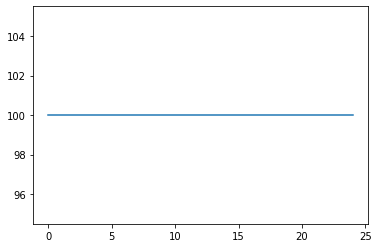

In [15]:
plt.plot(np.asarray(df_mng[['Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position']])[6025:6050])

# EDA

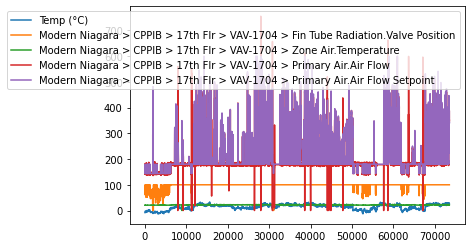

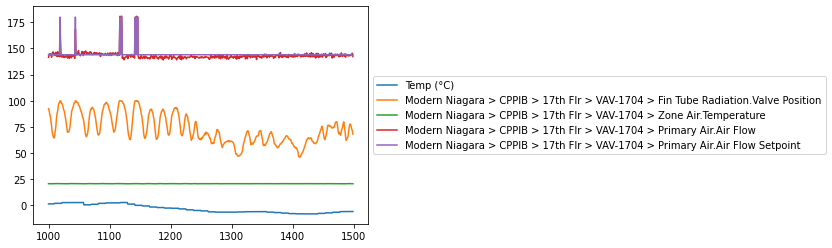

In [16]:
df_mng.columns
df_mng.plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint'])
df_mng[1000:1500].plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [32]:
corr = df_mng.corr()
corr.to_csv('/content/corr.csv')

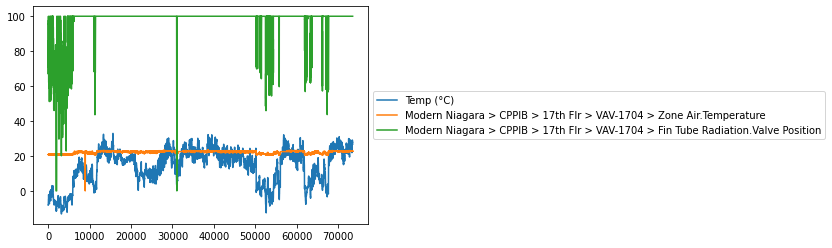

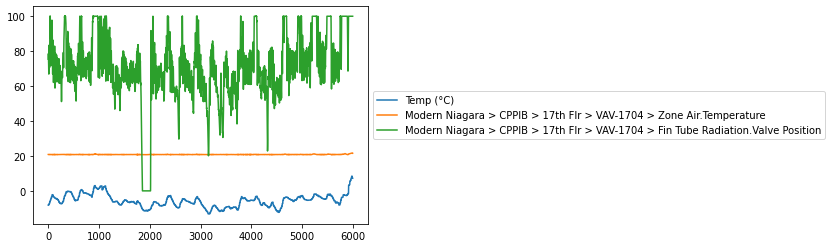

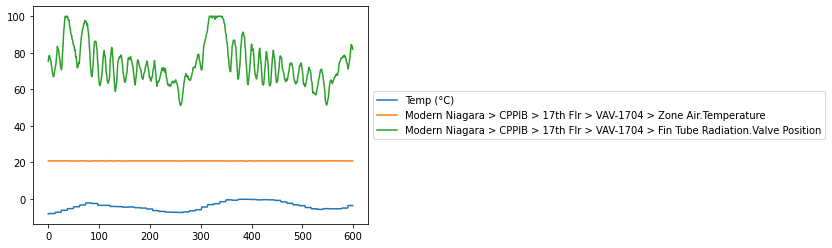

In [18]:
df_mng.plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
df_mng[0:6000].plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

df_mng[0:600].plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# ML

In [19]:
file_name = r'/content/drive/MyDrive/APS490/Datasets/VAV-1704-Valve-analysis.csv'
df = pd.read_csv(file_name)

In [20]:
df.head()

,Unnamed: 0,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint,DateTime 2,DateTime_y,Temp (°C)
0,0,2021-02-01 08:50:00,75.393906,20.830345,145.229980,144.0,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
1,1,2021-02-01 08:55:00,77.659592,20.837288,143.711624,144.0,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
2,2,2021-02-01 09:00:00,78.571823,20.823696,144.028381,144.0,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
3,3,2021-02-01 09:05:00,77.693443,20.799400,143.190216,144.0,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
4,4,2021-02-01 09:10:00,76.556046,20.791056,144.421188,144.0,2021-02-01 09:00:00,2021-02-01 09:00,-8.0


In [21]:
date = 'DateTime_x'
input1 = 'Temp (°C)'
input2 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'
input3 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature'
input4 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow'
input5 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Primary Air.Air Flow Setpoint'

input_list = [input1, input2, input3, input4,input5]
# dataset file name
df_input = df[input_list]
df_input = df_input.dropna()

In [22]:
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv 
import shutil
from numpy.lib.index_tricks import diag_indices_from

In [28]:
# def sliding_windows(data, seq_length, pred_length, sc):
#     x = []
#     y = []

#     for i in range(len(data)-seq_length-pred_length):
#         _x = data[i:(i+seq_length)]
#         _y = data[(i+seq_length):(i+seq_length+pred_length)]
#         #if not len(_y[_y == 0]):  # y = 0 is set manually by operators. Hence, remove the samples which contain 0 in y
#         x.append(_x)
#         y.append(_y)
#     x = np.array(x)
#     y = np.array(y)[:,:,1]
#     return x, y

def sliding_windows(data, seq_length, pred_length, sc):
    x = []
    y = []
    samples = []
    for i in range(len(data)-seq_length-pred_length):
        sample = data[i:(i+seq_length+pred_length)]
        samples.append(sample)
    random.shuffle(samples)
    x = np.array(samples)[:,:seq_length,:]
    y = np.array(samples)[:,seq_length:,:]
    y = y[:,:,1]
    return x, y

def train_test_split(x, y, param):
  train_size = param['train_size']
  test_size = param['test_size']

  if test_size < 0:
    test_size = len(x) - train_size

  dataX = torch.Tensor(np.array(x)).to('cuda')
  dataY = torch.Tensor(np.array(y)).to('cuda')

  trainX = torch.Tensor(np.array(x[0:train_size])).to('cuda')
  trainY = torch.Tensor(np.array(y[0:train_size])).to('cuda')

  testX = torch.Tensor(np.array(x[train_size:test_size + train_size])).to('cuda')
  testY = torch.Tensor(np.array(y[train_size:test_size + train_size])).to('cuda')
  return dataX, dataY, trainX, trainY, testX, testY

def batch_split(x, y, param):
  l = len(x)
  if 'batch_size' in param:
    batch_size = param['batch_size']
    batch_num = l // param['batch_size'] if l // param['batch_size'] == 0 else l // param['batch_size'] + 1
  elif 'batch_num' in param:
    batch_num = param['batch_num']
    batch_size = l // param['batch_num'] if l // param['batch_num'] == 0 else l // param['batch_num'] + 1
  
  x_list, y_list = [], []
  for i in range(batch_num):
    if (i+1) * batch_size > l:
      x_list.append(x[i * batch_size: ])
      y_list.append(y[i * batch_size: ])
    else: 
      x_list.append(x[i * batch_size: (i+1) * batch_size])
      y_list.append(y[i * batch_size: (i+1) * batch_size])
  # new_X = torch.Tensor(x_list).to('cuda')
  # new_Y = torch.Tensor(y_list).to('cuda')
  return x_list, y_list, batch_num

def train_and_evaluate(param, testX, testY, trainX, trainY, model):
  train_loss_list = torch.tensor([]).to('cuda')
  test_loss_list = torch.tensor([]).to('cuda')
  
  trainX, trainY, num_batches = batch_split(trainX, trainY, param)
  testX, testY, num_batches = batch_split(testX, testY, param)

  optimizer = param["optimizer"]
  if param['criterion'] == 'mse':
    criterion = torch.nn.MSELoss()
  elif param['criterion'] == 'mae':
    criterion = torch.nn.L1Loss()
  # Train the model
  for epoch in tqdm(range(param['num_epochs'])):
      curr_batch_train_loss_list = torch.tensor([]).to('cuda')
      curr_batch_test_loss_list = torch.tensor([]).to('cuda')
      for b in range(num_batches):
        outputs = model(trainX[b])
        optimizer.zero_grad()

        # obtain the loss function
        train_loss = criterion(outputs, trainY[b])

        curr_batch_train_loss_list = torch.cat((curr_batch_train_loss_list ,torch.tensor([train_loss.item()]).to('cuda')))

        train_loss.backward()
        
        optimizer.step()

        with torch.no_grad():
          pred_testY = model(testX[b])
          test_loss = criterion(pred_testY, testY[b])
          curr_batch_test_loss_list = torch.cat((curr_batch_test_loss_list ,torch.tensor([test_loss.item()]).to('cuda')))

      train_loss_list = torch.cat((train_loss_list ,torch.tensor([curr_batch_train_loss_list.mean().item()]).to('cuda')))
      test_loss_list = torch.cat((train_loss_list ,torch.tensor([curr_batch_test_loss_list.mean().item()]).to('cuda')))

      if (epoch + 1) % 50 == 0:
        print("Epoch: %d, train_loss: %1.5f, test_loss: %1.5f" % (epoch, curr_batch_train_loss_list.mean().item(), curr_batch_test_loss_list.mean().item()))
  return model, train_loss_list, test_loss_list

def execute_and_save(param, model_name):

  if param['criterion'] == 'mse':
    criterion = torch.nn.MSELoss()
  elif param['criterion'] == 'mae':
    criterion = torch.nn.L1Loss()
  if model_name == 'lstm':
    model = LSTM(param['num_classes'], param['input_size'], param['hidden_size'], param['num_layers'])
  elif model_name == 'gru':
    model = GRUNet(param['num_classes'], param['input_size'], param['hidden_size'], param['num_layers'])
  else:
    print('Invalid model name. Please double-check.')
    return
  
  model.to('cuda')
  optimizer = torch.optim.Adam(model.parameters(), lr=param['learning_rate'])
  param["optimizer"] = optimizer

  sc = MinMaxScaler()
  training_data = sc.fit_transform(df_input)
  x, y = sliding_windows(training_data, param['seq_length'], param['pred_length'], sc)
  dataX, dataY, trainX, trainY, testX, testY = train_test_split(x, y, param)

  model, train_loss, test_loss = train_and_evaluate(param, testX, testY, trainX, trainY, model)


  model.eval()
  with torch.no_grad():
    test_predict = model(testX)
    loss = criterion(test_predict, testY)
  data_predict = test_predict.data.cpu().numpy()
  data_true = torch.squeeze(testY).data.data.cpu().numpy()

  min = sc.data_min_[1]
  max = sc.data_max_[1]

  data_predict_np = data_predict * (max - min) + min
  data_predict_df = pd.DataFrame(data_predict_np)
  #df.to_csv('pred_rst.csv')
  data_true_np = data_true * (max - min) + min
  data_true_df = pd.DataFrame(data_true_np)
  #df.to_csv('true_value.csv')
  return data_predict_df, data_true_df, data_predict_np, data_true_np, loss, model

## LSTM

In [114]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes).to('cuda')

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to('cuda')
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to('cuda')
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size).to('cuda')
        
        out = self.fc(h_out)
        return out

In [147]:
param_lstm = {
    'num_epochs':600,
    'batch_num':1,
    'learning_rate': 0.008,
    'dropout': 0,
    'input_size': len(input_list),
    'hidden_size': 7,
    'num_layers': 1,
    'num_classes': 24, # should be same as pred_length
    'seq_length': 48,
    'pred_length':24,
    'train_size': 50000,
    'test_size': 10000,
}

fields = ['index'] + list(param_lstm.keys()) + ['optimizer', 'loss']

results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_lstm/'
if not os.path.exists(results_path):
  os.mkdir(results_path)
os.chdir(results_path)
for f in os.listdir():
  if os.path.isdir(f):
    shutil.rmtree(f)
  else:
    os.remove(f)

for criteria in ['mae']:
#for criteria in ['mse']:
  os.chdir(results_path)
  min_loss, index = -1, -1
  predict_df, true_df, model_to_save = None, None, None
  rows = []
  param_lstm['criterion'] = criteria

  count = 0
  for sq in [48, 144, 288]:
    param_lstm['seq_length'] = sq
    for hidden_size in [4, 8, 16]:
      param_lstm['hidden_size'] = hidden_size
      
      row = list(param_lstm.values())
      test_predict_df, test_true_df, test_predict_np, test_true_np, loss, model = execute_and_save(param_lstm, 'lstm')
      rows.append([count] + row + [loss.item()])
      if min_loss < 0 or min_loss > loss:
        min_loss = loss
        index = count
        predict_df, true_df, model_to_save = test_predict_df, test_true_df, model
      count += 1


  filename = "{}_results_report.csv".format(criteria)
  # writing to csv file 
  with open(filename, 'w') as csvfile: 
      csvwriter = csv.writer(csvfile) 
      csvwriter.writerow(fields) 
      csvwriter.writerows(rows)
  os.mkdir(results_path+"{}_optimized_model".format(criteria))
  os.chdir(results_path+"{}_optimized_model".format(criteria))
  predict_df.to_csv('prediction_testY_results_{}(index:{}).csv'.format(criteria, index))
  true_df.to_csv('true_testY_results_{}(index:{}).csv'.format(criteria, index))
  torch.save(model_to_save, 'model_{}(index:{}).pth'.format(criteria, index))

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09655, test_loss: 0.09183
Epoch: 99, train_loss: 0.03217, test_loss: 0.03175
Epoch: 149, train_loss: 0.01921, test_loss: 0.01910
Epoch: 199, train_loss: 0.01769, test_loss: 0.01793
Epoch: 249, train_loss: 0.01692, test_loss: 0.01684
Epoch: 299, train_loss: 0.01606, test_loss: 0.01580
Epoch: 349, train_loss: 0.01507, test_loss: 0.01557
Epoch: 399, train_loss: 0.01516, test_loss: 0.01485
Epoch: 449, train_loss: 0.01530, test_loss: 0.01541
Epoch: 499, train_loss: 0.01456, test_loss: 0.01470
Epoch: 549, train_loss: 0.01480, test_loss: 0.01504
Epoch: 599, train_loss: 0.01486, test_loss: 0.01461


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04440, test_loss: 0.04135
Epoch: 99, train_loss: 0.03143, test_loss: 0.03051
Epoch: 149, train_loss: 0.02769, test_loss: 0.02677
Epoch: 199, train_loss: 0.02014, test_loss: 0.02165
Epoch: 249, train_loss: 0.02150, test_loss: 0.01998
Epoch: 299, train_loss: 0.01795, test_loss: 0.01827
Epoch: 349, train_loss: 0.01699, test_loss: 0.01714
Epoch: 399, train_loss: 0.01736, test_loss: 0.01947
Epoch: 449, train_loss: 0.01909, test_loss: 0.01699
Epoch: 499, train_loss: 0.01575, test_loss: 0.01625
Epoch: 549, train_loss: 0.01571, test_loss: 0.01699
Epoch: 599, train_loss: 0.01422, test_loss: 0.01537


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04147, test_loss: 0.03901
Epoch: 99, train_loss: 0.03243, test_loss: 0.03138
Epoch: 149, train_loss: 0.03299, test_loss: 0.03182
Epoch: 199, train_loss: 0.03197, test_loss: 0.03077
Epoch: 249, train_loss: 0.03194, test_loss: 0.03019
Epoch: 299, train_loss: 0.02855, test_loss: 0.02830
Epoch: 349, train_loss: 0.02534, test_loss: 0.02162
Epoch: 399, train_loss: 0.01996, test_loss: 0.01922
Epoch: 449, train_loss: 0.01889, test_loss: 0.01908
Epoch: 499, train_loss: 0.02215, test_loss: 0.01999
Epoch: 549, train_loss: 0.01788, test_loss: 0.01703
Epoch: 599, train_loss: 0.02003, test_loss: 0.01804


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.06439, test_loss: 0.06277
Epoch: 99, train_loss: 0.03299, test_loss: 0.03339
Epoch: 149, train_loss: 0.03090, test_loss: 0.03150
Epoch: 199, train_loss: 0.03046, test_loss: 0.03117
Epoch: 249, train_loss: 0.02868, test_loss: 0.02929
Epoch: 299, train_loss: 0.01962, test_loss: 0.02018
Epoch: 349, train_loss: 0.01824, test_loss: 0.01921
Epoch: 399, train_loss: 0.01742, test_loss: 0.01824
Epoch: 449, train_loss: 0.01780, test_loss: 0.01824
Epoch: 499, train_loss: 0.01596, test_loss: 0.01685
Epoch: 549, train_loss: 0.01628, test_loss: 0.01669
Epoch: 599, train_loss: 0.01701, test_loss: 0.01645


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.05339, test_loss: 0.05036
Epoch: 99, train_loss: 0.02663, test_loss: 0.02528
Epoch: 149, train_loss: 0.02177, test_loss: 0.02080
Epoch: 199, train_loss: 0.01963, test_loss: 0.01822
Epoch: 249, train_loss: 0.01766, test_loss: 0.01667
Epoch: 299, train_loss: 0.01562, test_loss: 0.01588
Epoch: 349, train_loss: 0.01557, test_loss: 0.01588
Epoch: 399, train_loss: 0.01610, test_loss: 0.01539
Epoch: 449, train_loss: 0.01588, test_loss: 0.01542
Epoch: 499, train_loss: 0.01573, test_loss: 0.01561
Epoch: 549, train_loss: 0.01513, test_loss: 0.01535
Epoch: 599, train_loss: 0.01471, test_loss: 0.01383


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.03747, test_loss: 0.03810
Epoch: 99, train_loss: 0.03124, test_loss: 0.03034
Epoch: 149, train_loss: 0.03116, test_loss: 0.02892
Epoch: 199, train_loss: 0.02217, test_loss: 0.02334
Epoch: 249, train_loss: 0.02093, test_loss: 0.01827
Epoch: 299, train_loss: 0.01844, test_loss: 0.01749
Epoch: 349, train_loss: 0.02026, test_loss: 0.01817
Epoch: 399, train_loss: 0.01738, test_loss: 0.01779
Epoch: 449, train_loss: 0.01642, test_loss: 0.01494
Epoch: 499, train_loss: 0.01707, test_loss: 0.01581
Epoch: 549, train_loss: 0.01701, test_loss: 0.01604
Epoch: 599, train_loss: 0.01926, test_loss: 0.01816


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.14405, test_loss: 0.13606
Epoch: 99, train_loss: 0.03466, test_loss: 0.03625
Epoch: 149, train_loss: 0.03053, test_loss: 0.03251
Epoch: 199, train_loss: 0.02607, test_loss: 0.02757
Epoch: 249, train_loss: 0.01578, test_loss: 0.01672
Epoch: 299, train_loss: 0.01557, test_loss: 0.01641
Epoch: 349, train_loss: 0.01536, test_loss: 0.01633
Epoch: 399, train_loss: 0.01492, test_loss: 0.01592
Epoch: 449, train_loss: 0.01496, test_loss: 0.01586
Epoch: 499, train_loss: 0.01481, test_loss: 0.01543
Epoch: 549, train_loss: 0.01510, test_loss: 0.01577
Epoch: 599, train_loss: 0.01448, test_loss: 0.01540


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04409, test_loss: 0.04157
Epoch: 99, train_loss: 0.03209, test_loss: 0.03032
Epoch: 149, train_loss: 0.03177, test_loss: 0.02978
Epoch: 199, train_loss: 0.03216, test_loss: 0.02886
Epoch: 249, train_loss: 0.03032, test_loss: 0.02907
Epoch: 299, train_loss: 0.02886, test_loss: 0.02786
Epoch: 349, train_loss: 0.02120, test_loss: 0.02284
Epoch: 399, train_loss: 0.01888, test_loss: 0.01963
Epoch: 449, train_loss: 0.01659, test_loss: 0.01730
Epoch: 499, train_loss: 0.01747, test_loss: 0.01715
Epoch: 549, train_loss: 0.01774, test_loss: 0.01885
Epoch: 599, train_loss: 0.01773, test_loss: 0.01650


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04076, test_loss: 0.04150
Epoch: 99, train_loss: 0.03294, test_loss: 0.03141
Epoch: 149, train_loss: 0.03374, test_loss: 0.03163
Epoch: 199, train_loss: 0.03199, test_loss: 0.03057
Epoch: 249, train_loss: 0.02886, test_loss: 0.02701
Epoch: 299, train_loss: 0.02439, test_loss: 0.02213
Epoch: 349, train_loss: 0.01983, test_loss: 0.02062
Epoch: 399, train_loss: 0.01919, test_loss: 0.01939
Epoch: 449, train_loss: 0.01803, test_loss: 0.01642
Epoch: 499, train_loss: 0.01695, test_loss: 0.01730
Epoch: 549, train_loss: 0.01868, test_loss: 0.01821
Epoch: 599, train_loss: 0.01834, test_loss: 0.01856


## GRU

In [24]:
class GRUNet(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(GRUNet, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to('cuda')
        
        h_out, _ = self.gru(x, h_0)
        
        h_out = h_out[:, -1, :].to('cuda')
        
        out = self.fc(h_out).to('cuda')
        
        return out

In [29]:
param_gru = {
    'num_epochs':600,
    'batch_num': 1,
    'learning_rate': 0.008,
    'input_size': len(input_list),
    'hidden_size': 7,
    'num_layers': 1,
    'num_classes': 24, # dummy variable, same as pred_length
    'seq_length': 48,
    'pred_length':24,
    'train_size': 50000,
    'test_size': 10000,
    'criterion': 'mae'
}

fields = ['index'] + list(param_gru.keys()) + ['optimizer', 'loss']
results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_gru/'
if not os.path.exists(results_path):
  os.mkdir(results_path)
os.chdir(results_path)
for f in os.listdir():
  if os.path.isdir(f):
    shutil.rmtree(f)
  else:
    os.remove(f)

for criteria in ['mae']:
  os.chdir(results_path)
  min_loss, index = -1, -1
  predict_df, true_df, model_to_save = None, None, None
  rows = []
  param_gru['criterion'] = criteria

  count = 0
  count = 0
  for sq in [48, 144, 288]:
    param_gru['seq_length'] = sq
    for hidden_size in [4, 8, 16]:
      param_gru['hidden_size'] = hidden_size
  
      row = list(param_gru.values())
      test_predict_df, test_true_df, test_predict_np, test_true_np, loss, model = execute_and_save(param_gru, 'gru')
      rows.append([count] + row + [loss.item()])
      if min_loss < 0 or min_loss > loss:
        min_loss = loss
        index = count
        predict_df, true_df, model_to_save = test_predict_df, test_true_df, model
      count += 1


  filename = "{}_results_report.csv".format(criteria)
  # writing to csv file 
  with open(filename, 'w') as csvfile: 
      csvwriter = csv.writer(csvfile) 
      csvwriter.writerow(fields) 
      csvwriter.writerows(rows)
  os.mkdir(results_path+"{}_optimized_model".format(criteria))
  os.chdir(results_path+"{}_optimized_model".format(criteria))
  predict_df.to_csv('prediction_testY_results_{}(index:{}).csv'.format(criteria, index))
  true_df.to_csv('true_testY_results_{}(index:{}).csv'.format(criteria, index))
  torch.save(model_to_save, 'model_{}(index:{}).pth'.format(criteria, index))

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.08213, test_loss: 0.07310
Epoch: 99, train_loss: 0.03425, test_loss: 0.03412
Epoch: 149, train_loss: 0.03273, test_loss: 0.03289
Epoch: 199, train_loss: 0.03236, test_loss: 0.03296
Epoch: 249, train_loss: 0.03265, test_loss: 0.03228
Epoch: 299, train_loss: 0.03213, test_loss: 0.03217
Epoch: 349, train_loss: 0.03148, test_loss: 0.03125
Epoch: 399, train_loss: 0.03075, test_loss: 0.03063
Epoch: 449, train_loss: 0.02838, test_loss: 0.02808
Epoch: 499, train_loss: 0.02409, test_loss: 0.02389
Epoch: 549, train_loss: 0.02083, test_loss: 0.02070
Epoch: 599, train_loss: 0.01906, test_loss: 0.01903


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04377, test_loss: 0.04414
Epoch: 99, train_loss: 0.03007, test_loss: 0.03117
Epoch: 149, train_loss: 0.02844, test_loss: 0.02924
Epoch: 199, train_loss: 0.02612, test_loss: 0.02762
Epoch: 249, train_loss: 0.02251, test_loss: 0.02410
Epoch: 299, train_loss: 0.03298, test_loss: 0.02101
Epoch: 349, train_loss: 0.03026, test_loss: 0.02116
Epoch: 399, train_loss: 0.01704, test_loss: 0.01875
Epoch: 449, train_loss: 0.01720, test_loss: 0.01873
Epoch: 499, train_loss: 0.01499, test_loss: 0.01585
Epoch: 549, train_loss: 0.01615, test_loss: 0.01634
Epoch: 599, train_loss: 0.01841, test_loss: 0.01751


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04386, test_loss: 0.04355
Epoch: 99, train_loss: 0.02851, test_loss: 0.02946
Epoch: 149, train_loss: 0.02616, test_loss: 0.02604
Epoch: 199, train_loss: 0.02225, test_loss: 0.02559
Epoch: 249, train_loss: 0.02245, test_loss: 0.02168
Epoch: 299, train_loss: 0.01924, test_loss: 0.01996
Epoch: 349, train_loss: 0.01939, test_loss: 0.01980
Epoch: 399, train_loss: 0.02145, test_loss: 0.02092
Epoch: 449, train_loss: 0.01958, test_loss: 0.01942
Epoch: 499, train_loss: 0.01992, test_loss: 0.01944
Epoch: 549, train_loss: 0.02001, test_loss: 0.01849
Epoch: 599, train_loss: 0.01999, test_loss: 0.01820


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.05673, test_loss: 0.05316
Epoch: 99, train_loss: 0.02652, test_loss: 0.02595
Epoch: 149, train_loss: 0.02232, test_loss: 0.02060
Epoch: 199, train_loss: 0.01896, test_loss: 0.01932
Epoch: 249, train_loss: 0.01948, test_loss: 0.01808
Epoch: 299, train_loss: 0.01697, test_loss: 0.01682
Epoch: 349, train_loss: 0.01629, test_loss: 0.01691
Epoch: 399, train_loss: 0.01563, test_loss: 0.01571
Epoch: 449, train_loss: 0.01604, test_loss: 0.01670
Epoch: 499, train_loss: 0.01459, test_loss: 0.01493
Epoch: 549, train_loss: 0.01435, test_loss: 0.01422
Epoch: 599, train_loss: 0.01523, test_loss: 0.01428


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.05247, test_loss: 0.04908
Epoch: 99, train_loss: 0.02739, test_loss: 0.02717
Epoch: 149, train_loss: 0.02520, test_loss: 0.02384
Epoch: 199, train_loss: 0.02209, test_loss: 0.02469
Epoch: 249, train_loss: 0.02367, test_loss: 0.01998
Epoch: 299, train_loss: 0.01748, test_loss: 0.01930
Epoch: 349, train_loss: 0.01872, test_loss: 0.01753
Epoch: 399, train_loss: 0.01790, test_loss: 0.01830
Epoch: 449, train_loss: 0.01841, test_loss: 0.01880
Epoch: 499, train_loss: 0.01570, test_loss: 0.01634
Epoch: 549, train_loss: 0.01623, test_loss: 0.01615
Epoch: 599, train_loss: 0.01749, test_loss: 0.01607


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04454, test_loss: 0.04258
Epoch: 99, train_loss: 0.02965, test_loss: 0.02738
Epoch: 149, train_loss: 0.02862, test_loss: 0.02670
Epoch: 199, train_loss: 0.02719, test_loss: 0.02501
Epoch: 249, train_loss: 0.02382, test_loss: 0.02234
Epoch: 299, train_loss: 0.02095, test_loss: 0.02072
Epoch: 349, train_loss: 0.02246, test_loss: 0.02219
Epoch: 399, train_loss: 0.02356, test_loss: 0.02428
Epoch: 449, train_loss: 0.01809, test_loss: 0.01829
Epoch: 499, train_loss: 0.01987, test_loss: 0.01817
Epoch: 549, train_loss: 0.02435, test_loss: 0.02189
Epoch: 599, train_loss: 0.02047, test_loss: 0.01964


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.05729, test_loss: 0.05381
Epoch: 99, train_loss: 0.03095, test_loss: 0.03025
Epoch: 149, train_loss: 0.02783, test_loss: 0.02714
Epoch: 199, train_loss: 0.02545, test_loss: 0.02498
Epoch: 249, train_loss: 0.02325, test_loss: 0.02268
Epoch: 299, train_loss: 0.02022, test_loss: 0.01976
Epoch: 349, train_loss: 0.01698, test_loss: 0.01777
Epoch: 399, train_loss: 0.01595, test_loss: 0.01607
Epoch: 449, train_loss: 0.01541, test_loss: 0.01548
Epoch: 499, train_loss: 0.01497, test_loss: 0.01491
Epoch: 549, train_loss: 0.01474, test_loss: 0.01488
Epoch: 599, train_loss: 0.01451, test_loss: 0.01500


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04560, test_loss: 0.04487
Epoch: 99, train_loss: 0.03103, test_loss: 0.03004
Epoch: 149, train_loss: 0.02867, test_loss: 0.02771
Epoch: 199, train_loss: 0.02712, test_loss: 0.02637
Epoch: 249, train_loss: 0.02611, test_loss: 0.02458
Epoch: 299, train_loss: 0.02152, test_loss: 0.01968
Epoch: 349, train_loss: 0.02292, test_loss: 0.02109
Epoch: 399, train_loss: 0.01923, test_loss: 0.01924
Epoch: 449, train_loss: 0.01794, test_loss: 0.01666
Epoch: 499, train_loss: 0.01726, test_loss: 0.01897
Epoch: 549, train_loss: 0.01883, test_loss: 0.01718
Epoch: 599, train_loss: 0.02069, test_loss: 0.01968


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.04034, test_loss: 0.04215
Epoch: 99, train_loss: 0.02809, test_loss: 0.02810
Epoch: 149, train_loss: 0.02677, test_loss: 0.02796
Epoch: 199, train_loss: 0.02529, test_loss: 0.02382
Epoch: 249, train_loss: 0.02442, test_loss: 0.02244
Epoch: 299, train_loss: 0.02505, test_loss: 0.02247
Epoch: 349, train_loss: 0.01948, test_loss: 0.02366
Epoch: 399, train_loss: 0.01909, test_loss: 0.01915
Epoch: 449, train_loss: 0.02901, test_loss: 0.02407
Epoch: 499, train_loss: 0.01813, test_loss: 0.01846
Epoch: 549, train_loss: 0.01953, test_loss: 0.01913
Epoch: 599, train_loss: 0.01867, test_loss: 0.01838


# Demo

In [ ]:
# demo_path = r'/content/drive/MyDrive/APS490/ML/model6_demo_content/'
# if not os.path.exists(demo_path):
#   os.mkdir(demo_path)

# # mse
# lstm_mse_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_lstm/mse_optimized_model/'
# os.chdir(lstm_mse_results_path)
# for filename in os.listdir():
#   if filename.startswith('model'):
#     lstm = torch.load(filename)
#   elif filename.startswith('pre'):
#     lstm_mse_prediction = pd.read_csv(filename)
#   elif filename.startswith('true'):
#     lstm_mse_true = pd.read_csv(filename)

# lstm_pred_sample = np.array(lstm_mse_prediction)[sample_index][1:]
# lstm_true_sample = np.array(lstm_mse_true)[sample_index][1:]
# lstm_loss = mean_squared_error(lstm_pred_sample, lstm_true_sample)

# l = len(lstm_true_sample)
# timestamps = np.array(df[[date]])[-l:].reshape(l)

# plt.title('Predict valve position in next 2 hours')
# plt.plot([ 5*(i+1) for i in range(l)], lstm_pred_sample, label = "pred")
# plt.plot([ 5*(i+1) for i in range(l)], lstm_true_sample, label = "true")
# plt.xlabel('minutes')
# plt.legend(loc="upper left")

# mse_lstm_mape = pd.DataFrame({date:timestamps, input2:(np.abs(lstm_pred_sample-lstm_true_sample))/lstm_true_sample})

FileNotFoundError: ignored

In [ ]:
# lstm_true_sample

In [ ]:
# mse_lstm_mape


In [ ]:
# gru_mse_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_gru/mse_optimized_model/'
# os.chdir(lstm_mse_results_path)
# for filename in os.listdir():
#   if filename.startswith('model'):
#     gru = torch.load(filename)
#   elif filename.startswith('pre'):
#     gru_mse_prediction = pd.read_csv(filename)
#   elif filename.startswith('true'):
#     gru_mse_true = pd.read_csv(filename)

# gru_pred_sample = np.array(gru_mse_prediction)[sample_index][1:]
# gru_true_sample = np.array(gru_mse_true)[sample_index][1:]
# gru_loss = mean_squared_error(gru_pred_sample, gru_true_sample)

# l = len(gru_true_sample)
# timestamps = np.array(df[[date]])[-l:].reshape(l)

# plt.title('Predict valve position in next 2 hours')
# plt.plot([ 5*(i+1) for i in range(l)], gru_pred_sample, label = "pred")
# plt.plot([ 5*(i+1) for i in range(l)], gru_true_sample, label = "true")
# plt.xlabel('minutes')
# plt.legend(loc="upper left")
# plt.savefig(demo_path + 'demo.png')

# mse_demo = pd.DataFrame({date:timestamps, input2:list(gru_pred_sample)})

# mse_gru_mape = pd.DataFrame({date:timestamps, input2:(np.abs(gru_pred_sample-gru_true_sample))/gru_true_sample})
# mse_gru_mape.to_csv(demo_path + 'error.csv')

In [ ]:
# mse_gru_mape

In [148]:
sample_index = 108

In [63]:
lstm_mae_prediction.shape

(10000, 25)

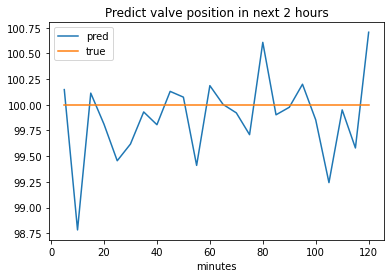

In [149]:
# mae
lstm_mae_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_lstm/mae_optimized_model/'
os.chdir(lstm_mae_results_path)
for filename in os.listdir():
  if filename.startswith('model'):
    lstm = torch.load(filename)
  elif filename.startswith('pre'):
    lstm_mae_prediction = pd.read_csv(filename)
  elif filename.startswith('true'):
    lstm_mae_true = pd.read_csv(filename)

lstm_pred_sample = np.array(lstm_mae_prediction)[sample_index][1:]
lstm_true_sample = np.array(lstm_mae_true)[sample_index][1:]
lstm_loss = mean_squared_error(lstm_pred_sample, lstm_true_sample)

l = len(lstm_true_sample)
timestamps = np.array(df[[date]])[-l:].reshape(l)

plt.title('Predict valve position in next 2 hours')
plt.plot([ 5*(i+1) for i in range(l)], lstm_pred_sample, label = "pred")
plt.plot([ 5*(i+1) for i in range(l)], lstm_true_sample, label = "true")
plt.xlabel('minutes')
plt.legend(loc="upper left")

mae_lstm_mape = pd.DataFrame({date:timestamps, input2:(np.abs(lstm_pred_sample-lstm_true_sample))/lstm_true_sample})

In [150]:
mae_lstm_mape

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
0,2021-08-22 19:00:00,0.001477
1,2021-08-22 19:05:00,0.012175
2,2021-08-22 19:10:00,0.001134
3,2021-08-22 19:15:00,0.001889
4,2021-08-22 19:20:00,0.005446
5,2021-08-22 19:25:00,0.003819
6,2021-08-22 19:30:00,0.000697
7,2021-08-22 19:35:00,0.001938
8,2021-08-22 19:40:00,0.001303
9,2021-08-22 19:45:00,0.000744


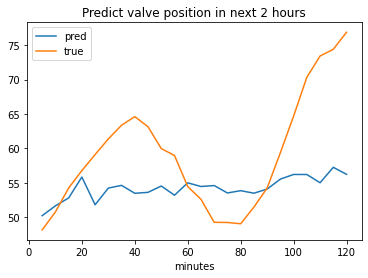

In [ ]:


gru_mae_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_gru/mae_optimized_model/'
os.chdir(lstm_mae_results_path)
for filename in os.listdir():
  if filename.startswith('model'):
    gru = torch.load(filename)
  elif filename.startswith('pre'):
    gru_mae_prediction = pd.read_csv(filename)
  elif filename.startswith('true'):
    gru_mae_true = pd.read_csv(filename)

gru_pred_sample = np.array(gru_mae_prediction)[sample_index][1:]
gru_true_sample = np.array(gru_mae_true)[sample_index][1:]
gru_loss = mean_squared_error(gru_pred_sample, gru_true_sample)

l = len(gru_true_sample)
timestamps = np.array(df[[date]])[-l:].reshape(l)

plt.title('Predict valve position in next 2 hours')
plt.plot([ 5*(i+1) for i in range(l)], gru_pred_sample, label = "pred")
plt.plot([ 5*(i+1) for i in range(l)], gru_true_sample, label = "true")
plt.xlabel('minutes')
plt.legend(loc="upper left")
mae_gru_mape = pd.DataFrame({date:timestamps, input2:(np.abs(gru_pred_sample-gru_true_sample))/gru_true_sample})

mae_demo = pd.DataFrame({date:timestamps, input2:list(gru_pred_sample)})

In [ ]:
mae_gru_mape

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
0,2021-08-22 19:00:00,0.043023
1,2021-08-22 19:05:00,0.017623
2,2021-08-22 19:10:00,0.026614
3,2021-08-22 19:15:00,0.016584
4,2021-08-22 19:20:00,0.123559
5,2021-08-22 19:25:00,0.116516
6,2021-08-22 19:30:00,0.137962
7,2021-08-22 19:35:00,0.172486
8,2021-08-22 19:40:00,0.150965
9,2021-08-22 19:45:00,0.090775


In [ ]:
mse_demo.to_csv(demo_path+'demo_prediction_mse.csv')


NameError: ignored